In [1]:
import operator
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=1.0)

from sklearn.linear_model  import LinearRegression

from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation

In [3]:
s = np.random.normal(loc=5, scale=1.1, size=1000)

In [4]:
## Verify the mean and the variance:
abs(mu - np.mean(s))

5.047421133870602

In [5]:
abs(sigma - np.std(s))

1.0175100310924665

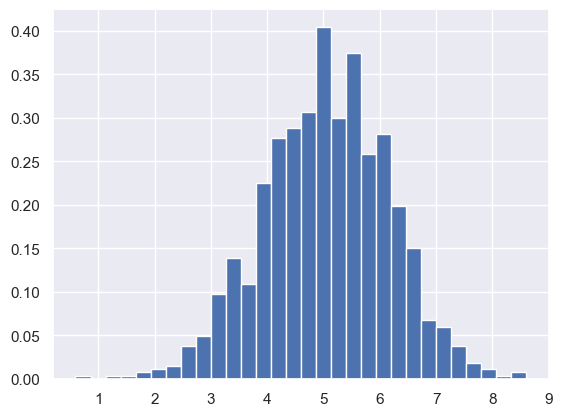

In [6]:
count, bins, ignored = plt.hist(s, 30, density=True)

# plt.plot(bins, 
#          1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')

#### we will generate some random data, it will have some non linearity

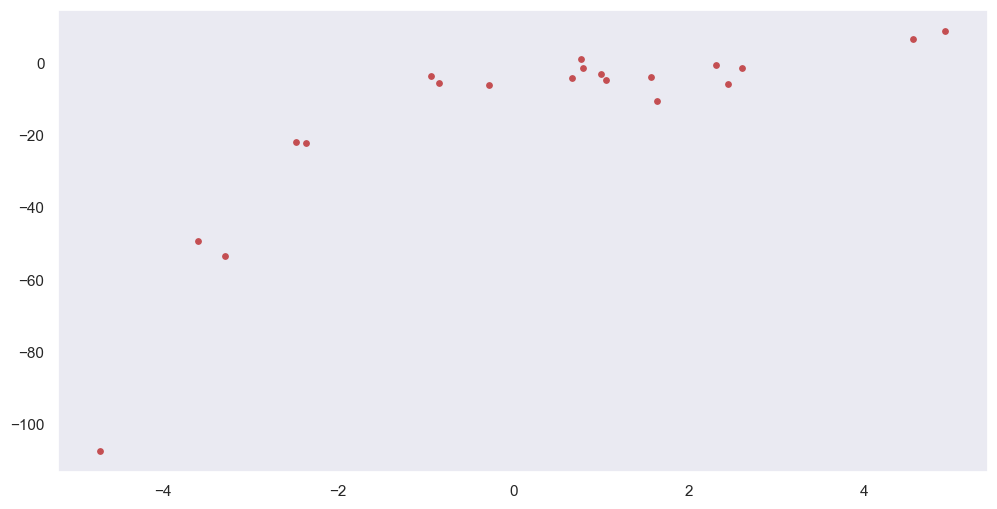

In [7]:
np.random.seed(0)
X_data = 2 - 3 * np.random.normal(0, 1, 20)

y_data = X_data - 2 * (X_data ** 2) + 0.5 * (X_data ** 3) + np.random.normal(-3, 3, 20)

plt.figure(figsize=(12, 6))
plt.scatter(X_data, y_data, s=15, c='r');
plt.grid()

In [8]:
X_data, y_data

(array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
         4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
         1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
         0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722]),
 array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
         -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
          -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
          -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
         -21.76152272,   -1.51295226,   -4.75491157,    6.50723268]))

Let’s apply a linear regression model to this dataset.

In [8]:
# transforming the data to include another axis
X = X_data[:, np.newaxis]
y = y_data[:, np.newaxis]

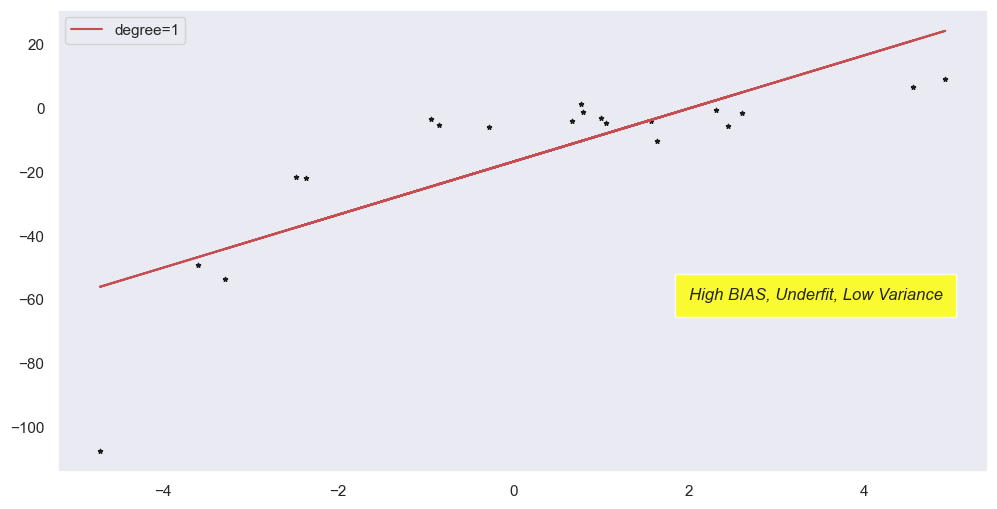

In [9]:
linreg = LinearRegression()
linreg.fit(X, y)

y_pred = linreg.predict(X)

plt.figure(figsize=(12, 6))

plt.scatter(X, y, s=10, c='k', marker='*')
plt.plot(X, y_pred, color='r', label='degree=1');

plt.text(2, -60, 'High BIAS, Underfit, Low Variance', style='italic',
        bbox={'facecolor':'yellow', 'alpha':0.8, 'pad':10})
plt.grid()
plt.legend();


##### Qs. How to identify the `HIGH BIAS` model?

1. Start with training data (X_train|y_train)
2. Train a model (model.fit(X_train, y_train)
3. we will check the accuracy/mse/r2 of the model using the X_train
    - y_pred_train = model.predict(X_train)
    - mse_train = metrics.mean_square_error (y_train, y_pred_train)
        - 150
    - r2_train  = metrics.r2_score (y_train, y_pred_train)
        - r2_train = .55
4. we will check the accuracy/mse/r2 of the model using the X_test
    - y_pred_test = model.predict(X_test)
    - mse_test    = metrics.mean_square_error (y_test, y_pred_test)
        - 150
    - r2_test     = metrics.r2_score (y_train, y_pred_train)
        - r2_test = .55

##### Qs. How to identify the `HIGH VARIANCE` model?

1. Start with training data (X_train|y_train)
2. Train a model (model.fit(X_train, y_train)
3. we will check the accuracy/mse/r2 of the model using the X_train
    - y_pred_train = model.predict(X_train)
    - mse_train = metrics.mean_square_error (y_train, y_pred_train)
        - 10
    - r2_train  = metrics.r2_score (y_train, y_pred_train)
        - r2_train = .95
4. we will check the accuracy/mse/r2 of the model using the X_test
    - y_pred_test = model.predict(X_test)
    - mse_test = metrics.mean_square_error (y_test, y_pred_test)
        - 75
    - r2_test  = metrics.r2_score (y_train, y_pred_train)
        - r2_test = .65
        
- `Observation`
    - Training metrics are very good
    - Testing metrics are low
    
    - this is a case of `OVERFITTED` model
    - the model is probably `high variance`
    
- TO conclusively say that a model is high variance model, we need to do multiple tests
    - Test 1
        - we will check the accuracy/mse/r2 of the model using the X_test1
            - y_pred_test1 = model.predict(X_test1)
            - mse_test = metrics.mean_square_error (y_test1, y_pred_test1)
                - 80
            - r2_test1  = metrics.r2_score (y_train, y_pred_train)
                - r2_test1 = .72
                
| Test run | mse | r2|
|----------|-----| --|
|1 | 72 | .77|
|2 | 79 | .71|
|3 | 71 | .79|
|4 | 82 | .87|
|4 | 87 | .81|


In [ ]:
id(X), id(X_data)

(2400112371472, 2399892020560)

The plot of the best fit line is..

We can see that the straight line is unable to capture the patterns in the data. This is an example of __under-fitting__. Computing the RMSE and R²-score of the linear line gives:

In [11]:
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2 value                : ', metrics.r2_score(y, y_pred))

y-intercept             :  [-16.79645067]
beta coefficients       :  [[8.29238755]]
Mean Abs Error   MAE    :  11.889431199878437
Mean Sq  Error MSE      :  253.07217948430366
Root Mean Sq Error RMSE :  15.908242501429996
r2 value                :  0.6386750054827147


Computing the RMSE and R²-score

To overcome under-fitting, we need to increase the complexity of the model.

To convert the original features into their higher order terms we will use the __PolynomialFeatures__ class provided by scikit-learn. Next, we train the model using Linear Regression.